In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(11.7,8.27)})
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("../../data/sensor.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)
df

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,2018-04-01 00:01:00,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2018-04-01 00:02:00,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,2018-04-01 00:03:00,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,2018-04-01 00:04:00,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,...,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,NaN,231.1921,NORMAL
220316,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,...,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,NaN,231.1921,NORMAL
220317,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,...,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,NaN,232.0602,NORMAL
220318,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,...,40.62500,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,NaN,234.0856,NORMAL


# EDA

<AxesSubplot:xlabel='machine_status', ylabel='count'>

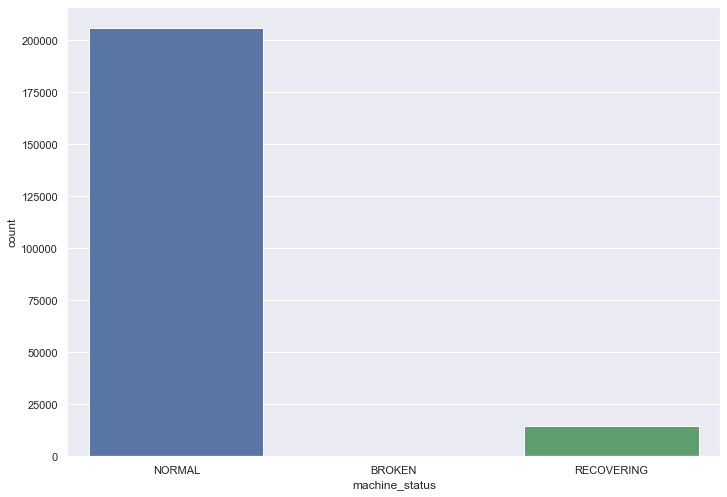

In [3]:
sns.countplot(data=df, x="machine_status")

In [4]:
df["machine_status"] = pd.Categorical(df["machine_status"])

In [5]:
df["timestamp"] = pd.to_datetime(df["timestamp"])

In [6]:
def numerical_machine_status(x):
    if x=="NORMAL":
        return 1
    elif x=="BROKEN":
        return -1
    else:
        return 0

In [7]:
df["machine_status_numerical"] = df["machine_status"].apply(numerical_machine_status)

<AxesSubplot:xlabel='timestamp', ylabel='machine_status_numerical'>

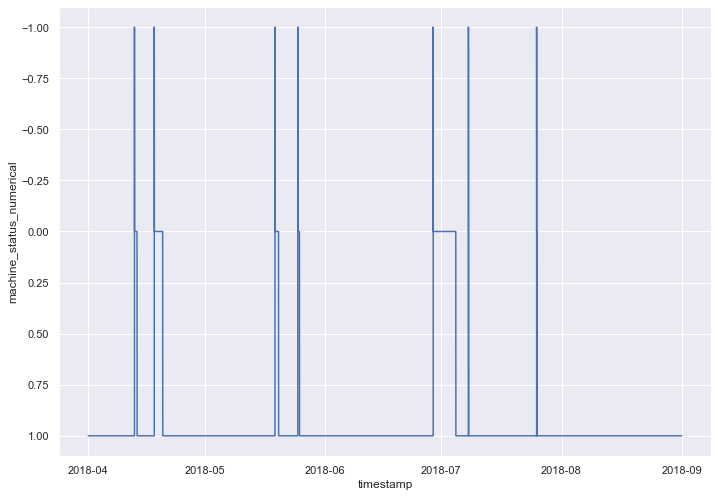

In [8]:
sns.lineplot(data=df, x="timestamp", y="machine_status_numerical")

Comme le status RECOVERING suit toujours le status BROKEN. Dans RECOVERING, la pompe essaie de récupérer de l'état BROKEN, donc l'état RECOVERING est considéré comme un état BROKEN (disons plus ABNORMAL).

In [9]:
def relabel_machine_status(x):
    if x == "BROKEN" or x == "RECOVERING":
        return "ABNORMAL"
    else:
        return x

In [10]:
df["relabelled_machine_status"] = df["machine_status"].apply(relabel_machine_status)

<AxesSubplot:xlabel='relabelled_machine_status', ylabel='count'>

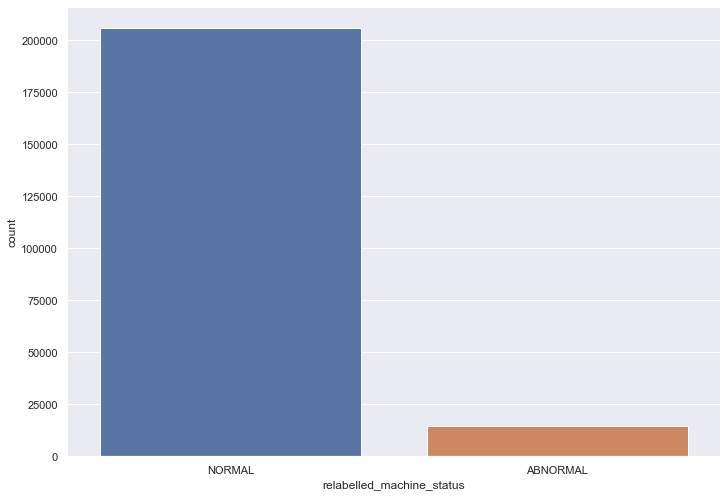

In [11]:
sns.countplot(data=df, x="relabelled_machine_status")

In [12]:
def numerical_machine_status(x):
    if x=="NORMAL":
        return 0
    else:
        return -1

In [13]:
df["relabelled_machine_status_numerical"] = df["relabelled_machine_status"].apply(numerical_machine_status)

<AxesSubplot:xlabel='timestamp'>

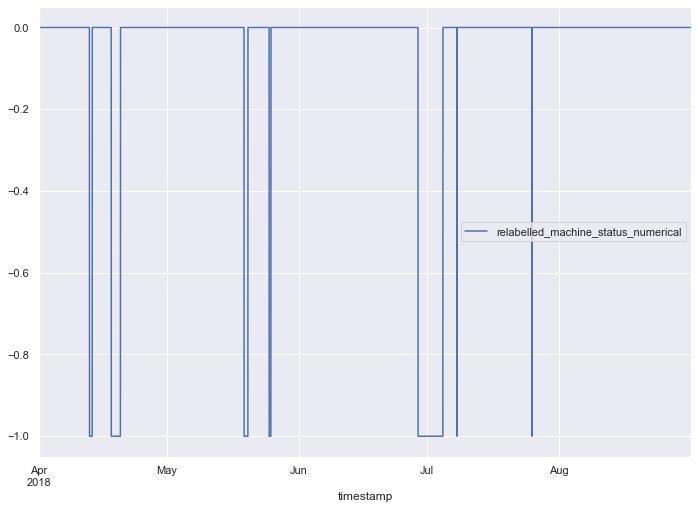

In [14]:
df.plot(x="timestamp", y="relabelled_machine_status_numerical")

## Missing values

In [15]:
missing_values = pd.DataFrame(df.drop(["timestamp", "machine_status", "machine_status_numerical"], axis=1).isnull().sum()).reset_index()
missing_values[0] = missing_values[0]*100/df.shape[0]
missing_values.sort_values(0, ascending=False, inplace=True)

<AxesSubplot:xlabel='0', ylabel='index'>

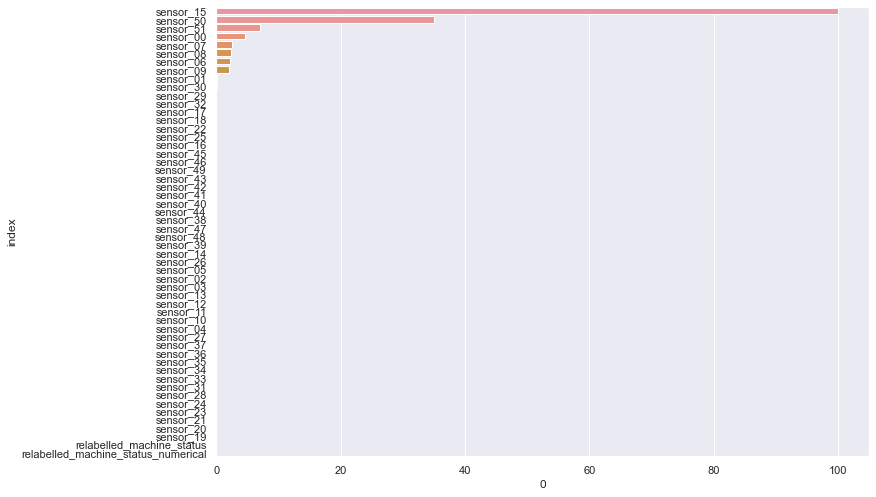

In [16]:
sns.barplot(data=missing_values, x=0, y="index")

## Fillna

In [20]:
df.drop(
    columns=
    [
        "timestamp",
        "machine_status",
        "relabelled_machine_status",
        "machine_status_numerical",
        "relabelled_machine_status_numerical"
    ]
).interpolate()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
0,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889
1,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889
2,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,15.01013,...,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037
3,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,15.08247,...,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250
4,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,15.08247,...,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,15.16204,...,30.208330,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,1000.0000,231.1921
220316,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,15.11863,...,29.947920,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,1000.0000,231.1921
220317,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,15.11863,...,30.208330,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,1000.0000,232.0602
220318,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,15.11863,...,30.208332,40.62500,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,1000.0000,234.0856


In [22]:
new_df = df.drop(
    columns=
    [
        "timestamp",
        "machine_status",
        "relabelled_machine_status",
        "machine_status_numerical",
        "relabelled_machine_status_numerical"
    ]
).interpolate()

In [23]:
new_df["timestamp"] = df["timestamp"]
new_df["machine_status"] = df["machine_status"]
new_df["relabelled_machine_status"] = df["relabelled_machine_status"]
new_df["machine_status_numerical"] = df["machine_status_numerical"]
new_df["relabelled_machine_status_numerical"] = df["relabelled_machine_status_numerical"]
new_df

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,timestamp,machine_status,relabelled_machine_status,machine_status_numerical,relabelled_machine_status_numerical
0,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,...,38.194440,157.9861,67.70834,243.0556,201.3889,2018-04-01 00:00:00,NORMAL,NORMAL,1,0
1,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,...,38.194440,157.9861,67.70834,243.0556,201.3889,2018-04-01 00:01:00,NORMAL,NORMAL,1,0
2,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,15.01013,...,38.194443,155.9606,67.12963,241.3194,203.7037,2018-04-01 00:02:00,NORMAL,NORMAL,1,0
3,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,15.08247,...,38.194440,155.9606,66.84028,240.4514,203.1250,2018-04-01 00:03:00,NORMAL,NORMAL,1,0
4,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,15.08247,...,38.773150,158.2755,66.55093,242.1875,201.3889,2018-04-01 00:04:00,NORMAL,NORMAL,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,15.16204,...,41.087960,212.3843,153.64580,1000.0000,231.1921,2018-08-31 23:55:00,NORMAL,NORMAL,1,0
220316,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,15.11863,...,40.798610,213.8310,156.25000,1000.0000,231.1921,2018-08-31 23:56:00,NORMAL,NORMAL,1,0
220317,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,15.11863,...,40.798610,217.3032,155.38190,1000.0000,232.0602,2018-08-31 23:57:00,NORMAL,NORMAL,1,0
220318,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,15.11863,...,40.509258,222.5116,153.93520,1000.0000,234.0856,2018-08-31 23:58:00,NORMAL,NORMAL,1,0


## Timestamp type

In [24]:
df.iloc[1]["timestamp"] - df.iloc[0]["timestamp"]

Timedelta('0 days 00:01:00')

In [25]:
false = 0
for i in range(1, len(df)):
    if df.iloc[i]["timestamp"] - df.iloc[i-1]["timestamp"] != df.iloc[1]["timestamp"] - df.iloc[0]["timestamp"]:
        false += 1
print("same interval for all: ", false == 0)

same interval for all:  True


## Description of the Dataframe

In [26]:
df.describe()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,relabelled_machine_status_numerical
count,210112.000000,219951.000000,220301.000000,220301.000000,220301.000000,220301.000000,215522.000000,214869.000000,215213.000000,215725.000000,...,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,143303.000000,204937.000000,220320.000000
mean,2.372221,47.591611,50.867392,43.752481,590.673936,73.396414,13.501537,15.843152,15.200721,14.799210,...,43.879591,42.656877,43.094984,48.018585,44.340903,150.889044,57.119968,183.049260,202.699667,-0.065741
std,0.412227,3.296666,3.666820,2.418887,144.023912,17.298247,2.163736,2.201155,2.037390,2.091963,...,11.044404,11.576355,12.837520,15.641284,10.442437,82.244957,19.143598,65.258650,109.588607,0.247829
min,0.000000,0.000000,33.159720,31.640620,2.798032,0.000000,0.014468,0.000000,0.028935,0.000000,...,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,27.488426,27.777779,-1.000000
25%,2.438831,46.310760,50.390620,42.838539,626.620400,69.976260,13.346350,15.907120,15.183740,15.053530,...,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060,167.534700,179.108800,0.000000
50%,2.456539,48.133678,51.649300,44.227428,632.638916,75.576790,13.642940,16.167530,15.494790,15.082470,...,42.968750,40.509260,40.219910,44.849540,42.534720,138.020800,52.662040,193.865700,197.338000,0.000000
75%,2.499826,49.479160,52.777770,45.312500,637.615723,80.912150,14.539930,16.427950,15.697340,15.118630,...,46.614580,45.138890,44.849540,51.215280,46.585650,208.333300,60.763890,219.907400,216.724500,0.000000
max,2.549016,56.727430,56.032990,48.220490,800.000000,99.999880,22.251160,23.596640,24.348960,25.000000,...,408.593700,1000.000000,320.312500,370.370400,303.530100,561.632000,464.409700,1000.000000,1000.000000,0.000000


## Distribution of normal and abnormal for all sensors

In [27]:
sensors = [
    ["sensor_00", "sensor_01", "sensor_02", "sensor_03"],
    ["sensor_04", "sensor_05", "sensor_06", "sensor_07"],
    ["sensor_08", "sensor_09", "sensor_10", "sensor_11"],
    ["sensor_12", "sensor_13", "sensor_14", "sensor_15"],
    ["sensor_16", "sensor_17", "sensor_18", "sensor_19"],
    ["sensor_20", "sensor_21", "sensor_22", "sensor_23"],
    ["sensor_24", "sensor_25", "sensor_26", "sensor_27"],
    ["sensor_28", "sensor_29", "sensor_30", "sensor_31"],
    ["sensor_32", "sensor_33", "sensor_34", "sensor_35"],
    ["sensor_36", "sensor_37", "sensor_38", "sensor_39"],
    ["sensor_40", "sensor_41", "sensor_42", "sensor_43"],
    ["sensor_44", "sensor_45", "sensor_46", "sensor_47"],
    ["sensor_48", "sensor_49", "sensor_50", "sensor_51"],
]

In [48]:
sensor_data = new_df.drop(
    columns=
    [
        "machine_status",
        "relabelled_machine_status",
        "machine_status_numerical",
    ]
)

In [34]:
def get_distrib_plot(sensor, df, ax_given=None):
    """
    Function to plot distribution of sensor readings for Normal and Broken state
    """
    # sensor values corrensponding machine status Normal
    normal = df[df['relabelled_machine_status_numerical']==0][sensor].values
    # sensor values corrensponding machine status Broken
    broken = df[df['relabelled_machine_status_numerical']==-1][sensor].values

    # distribution for normal state
    sns.distplot(normal, hist=False, label="Normal", ax=ax_given) 
    # distribution for broken state
    sns.distplot(broken, hist=False, label="Broken", ax=ax_given) 
    plt.title('Sensor readings corresponding Normal and Broken state')
    plt.xlabel(f'{sensor} readings')

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


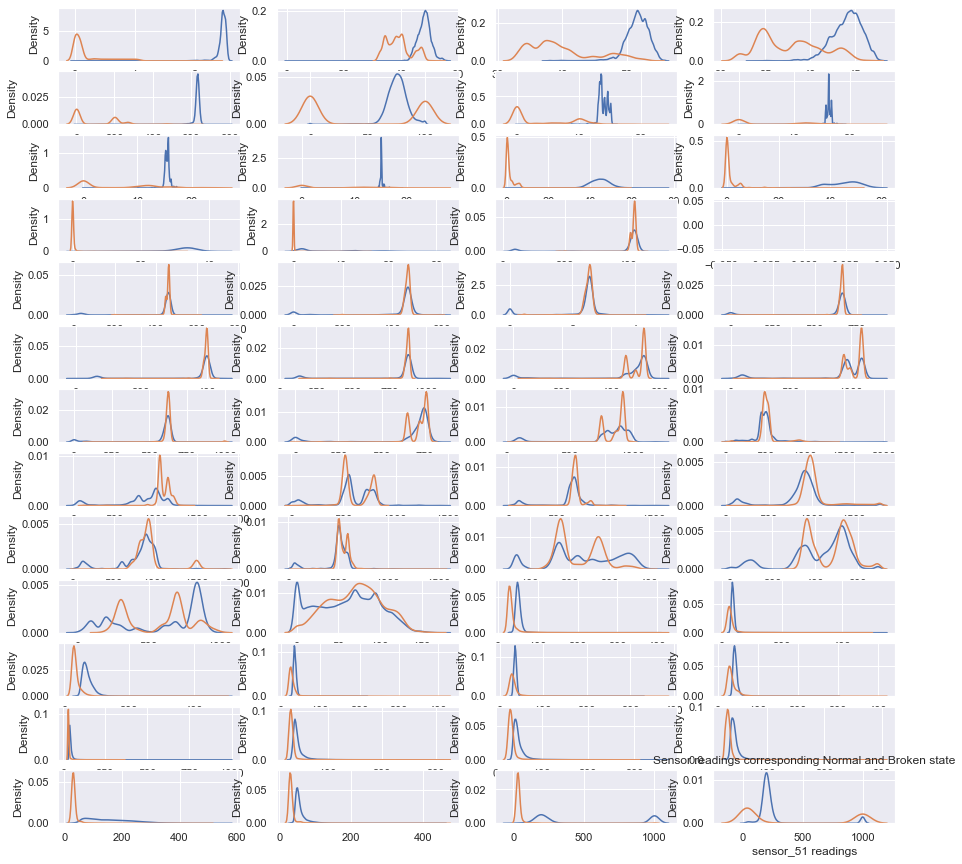

In [49]:
fig, axes = plt.subplots(13, 4, figsize=(15, 15))
for row in range(13):
    for col in range(4):
        get_distrib_plot(sensors[row][col], sensor_data, axes[row][col])
plt.show()

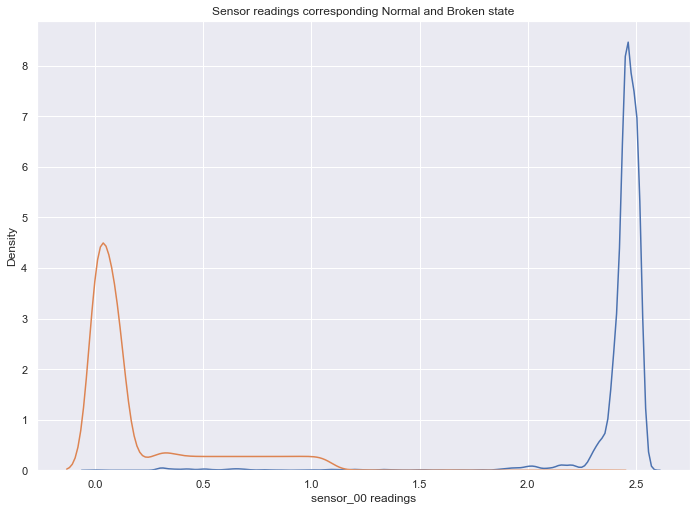

In [50]:
get_distrib_plot('sensor_00', sensor_data)
plt.show()

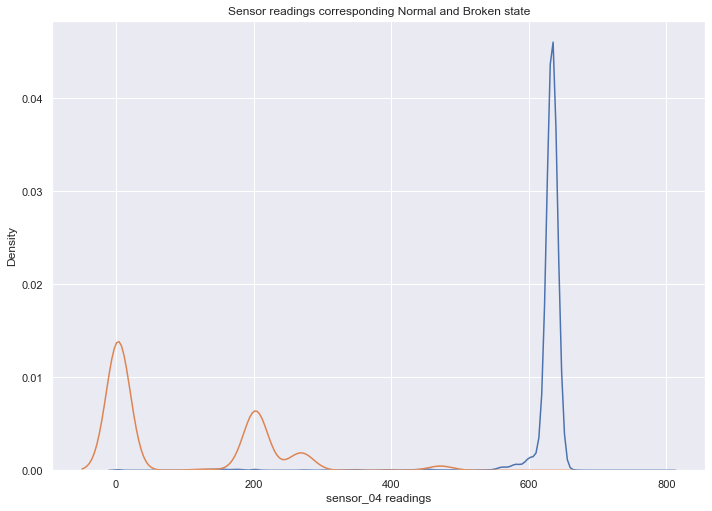

In [51]:
get_distrib_plot('sensor_04', sensor_data)
plt.show()

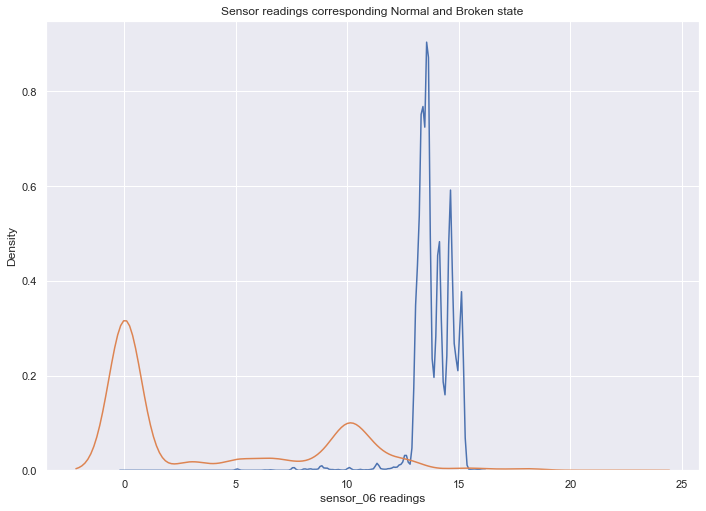

In [52]:
get_distrib_plot('sensor_06', sensor_data)
plt.show()

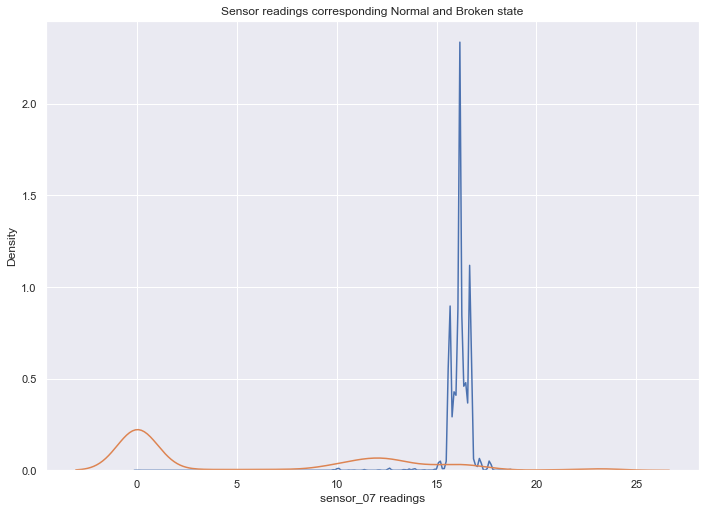

In [53]:
get_distrib_plot('sensor_07', sensor_data)
plt.show()

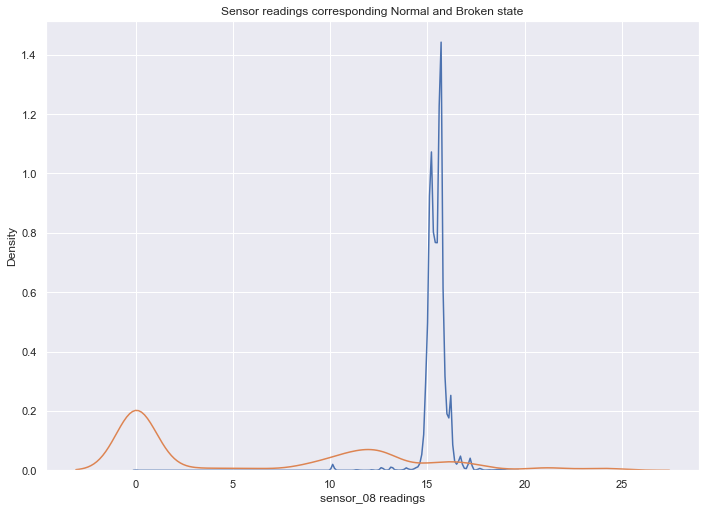

In [54]:
get_distrib_plot('sensor_08', sensor_data)
plt.show()

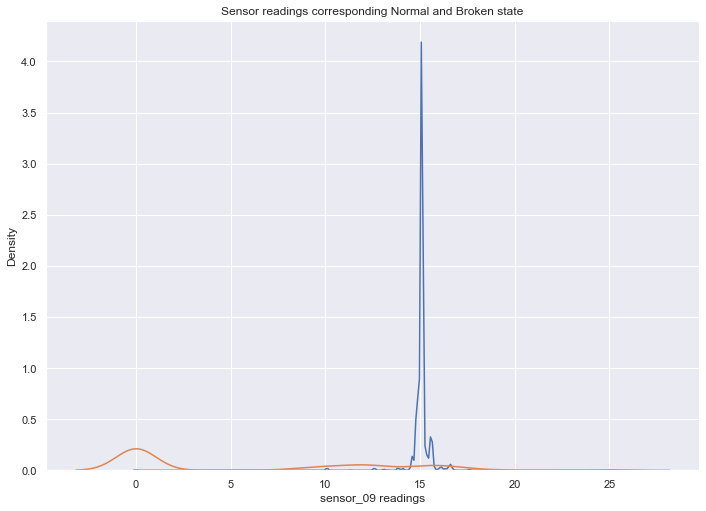

In [55]:
get_distrib_plot('sensor_09', sensor_data)
plt.show()

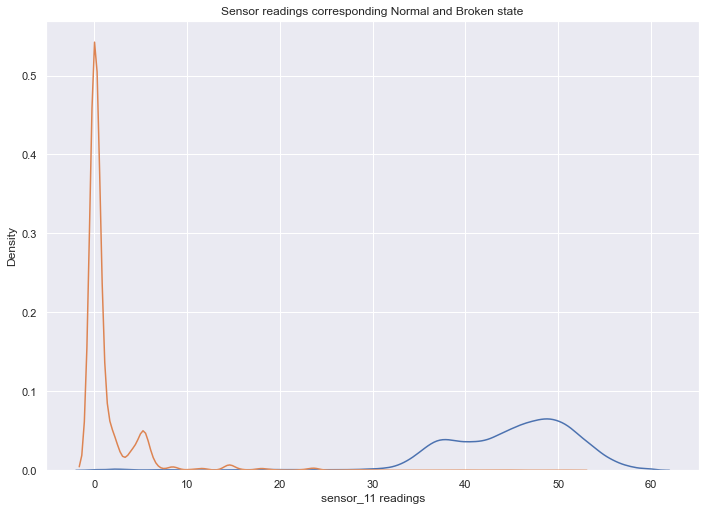

In [56]:
get_distrib_plot('sensor_11', sensor_data)
plt.show()

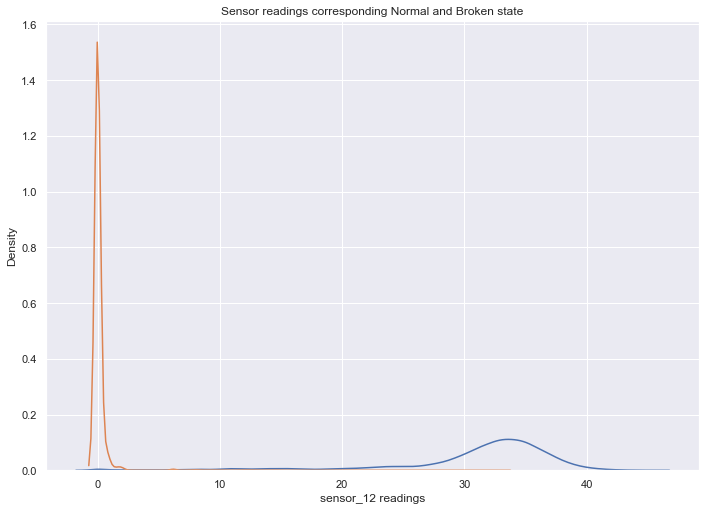

In [57]:
get_distrib_plot('sensor_12', sensor_data)
plt.show()

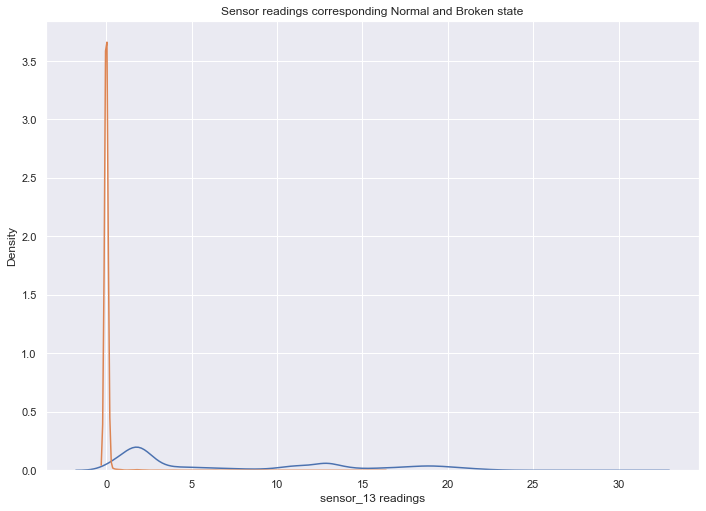

In [58]:
get_distrib_plot('sensor_13', sensor_data)
plt.show()

sensor_00
sensor_04
sensor_06


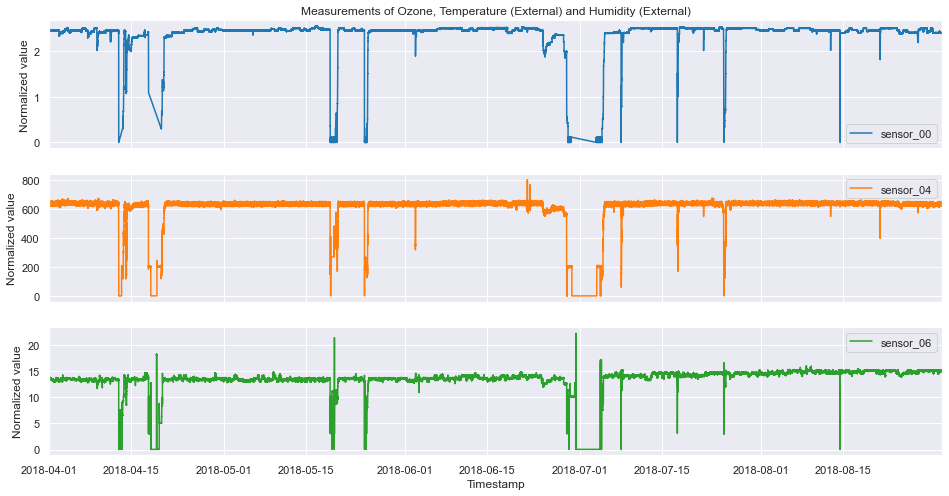

In [60]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(16, 8))
cols = [0, 4, 6]
colors = ['tab:blue', 'tab:orange', 'tab:green']
for i in range(3):
    ax = axs[i]
    col = sensor_data.columns[cols[i]]
    print(col)
    ax.plot(sensor_data["timestamp"], sensor_data[col], color=colors[i], label=col)
    ax.set_ylabel('Normalized value')
    ax.set_xlim([sensor_data["timestamp"].min(), sensor_data["timestamp"].max()])
    ax.legend()
    #ax.axvspan('2020-05-26 09:00:00-04:00', '2020-05-28 9:00:00-04:00', alpha=0.05, color='red')
    #ax.axvspan('2020-05-29 18:00:00-04:00', '2020-06-01 8:00:00-04:00', alpha=0.05, color='red')
axs[0].set_title('Measurements of Ozone, Temperature (External) and Humidity (External)')
plt.xlabel('Timestamp')
plt.show()

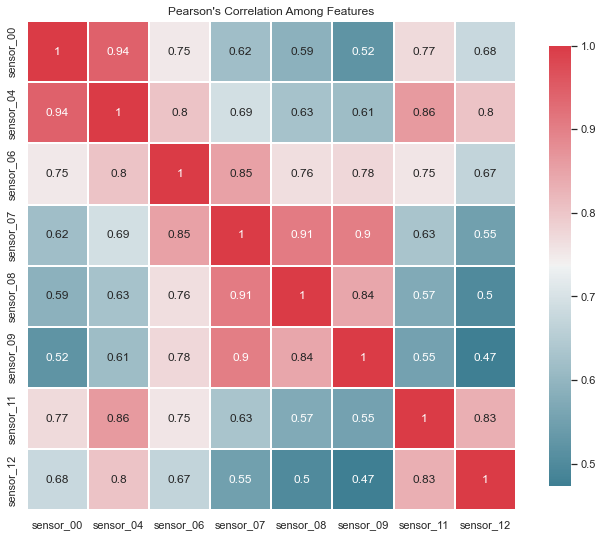

In [61]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(
        df[["sensor_00", "sensor_04", "sensor_06", "sensor_07", "sensor_08", "sensor_09", "sensor_11", "sensor_12"]].corr(), 
        cmap = sns.diverging_palette(220, 10, as_cmap = True),
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 })
plt.title("Pearson's Correlation Among Features")
plt.show()

# Pre processing

In [91]:
columns_to_drop = [
    "timestamp",
    "machine_status",
    "relabelled_machine_status",
    "machine_status_numerical",
    "relabelled_machine_status_numerical"
]
df_normalized = (new_df.drop(columns=columns_to_drop) - new_df.drop(columns=columns_to_drop).mean()) / new_df.drop(columns=columns_to_drop).std()
df_normalized["timestamp"] = new_df["timestamp"]
df_normalized["machine_status"] = new_df["relabelled_machine_status"]
df_normalized.set_index("timestamp", inplace=True)
df_normalized

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,0.316592,-0.153017,0.639353,1.057646,0.303460,0.177146,0.069626,0.204868,0.235627,0.190016,...,-0.176763,-0.260475,1.759652,0.185924,-0.588575,0.086321,0.553117,-0.573678,-0.248496,NORMAL
2018-04-01 00:01:00,0.316592,-0.153017,0.639353,1.057646,0.303460,0.177146,0.069626,0.204868,0.235627,0.190016,...,-0.176763,-0.260475,1.759652,0.185924,-0.588575,0.086321,0.553117,-0.573678,-0.248496,NORMAL
2018-04-01 00:02:00,0.282301,-0.074142,0.639353,1.093533,0.334797,0.008730,0.039723,0.175485,0.252534,0.175335,...,-0.200343,-0.285471,1.737112,0.204424,-0.588575,0.061693,0.522887,-0.578095,-0.238383,NORMAL
2018-04-01 00:03:00,0.308426,-0.153017,0.627519,1.093532,0.260070,0.207735,0.037233,0.241039,0.279100,0.199806,...,-0.271084,-0.310467,1.692030,0.204424,-0.588575,0.061693,0.507772,-0.580304,-0.240911,NORMAL
2018-04-01 00:04:00,0.283935,-0.139872,0.639353,1.093532,0.317923,0.184615,0.049692,0.229736,0.279100,0.199806,...,-0.223923,-0.335463,1.714571,0.241424,-0.533154,0.089840,0.492657,-0.575887,-0.248496,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 23:55:00,0.220252,0.031022,-0.094418,-0.252163,0.305870,-0.508870,0.657676,0.367625,0.264607,0.226722,...,-0.506884,2.214140,0.722787,0.019423,-0.311471,0.747749,5.042233,1.352058,-0.118289,NORMAL
2018-08-31 23:56:00,0.208821,0.031022,-0.082581,-0.252163,0.279354,-0.437043,0.670136,0.383449,0.264607,0.212038,...,-0.506884,2.089160,0.587544,0.000923,-0.339181,0.765339,5.178268,1.352058,-0.118289,NORMAL
2018-08-31 23:57:00,0.202290,0.031022,-0.094418,-0.252163,0.244803,-0.352608,0.647711,0.383449,0.279100,0.212038,...,-0.436143,1.964180,0.452301,0.000923,-0.339181,0.807558,5.132921,1.352058,-0.114496,NORMAL


In [85]:
df_normalized = df_normalized.groupby(pd.Grouper(key="timestamp", axis=0, freq="1h")).mean()
#df_normalized.set_index("timestamp", inplace=True)
df_normalized["machine_status"] = new_df["relabelled_machine_status"]
df_normalized

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,0.298521,0.290428,0.620418,1.022360,0.301692,0.135338,0.053220,0.214476,0.280830,0.201191,...,-0.320601,-0.335463,0.542088,-0.057044,-0.481428,0.566266,1.099519,-0.581064,-0.210740,NaN
2018-04-01 01:00:00,0.298086,0.126766,0.610752,0.902443,0.302495,0.067681,0.132167,0.212781,0.284252,0.203149,...,-0.362260,0.048644,0.330207,-0.264861,-0.482352,0.362326,0.849620,-0.606056,-0.238236,NaN
2018-04-01 02:00:00,0.297052,0.422761,0.584518,0.760996,0.303821,0.093748,0.133413,0.214062,0.269237,0.203108,...,-0.356758,-0.036759,0.608207,0.027440,-0.561326,0.276364,0.978348,-0.618841,-0.210888,NaN
2018-04-01 03:00:00,0.298630,0.320225,0.575051,0.606091,0.296809,-0.008009,0.136071,0.213609,0.276201,0.202863,...,-0.385054,0.704792,0.829855,-0.157252,-0.575181,0.650528,2.482278,-0.537399,-0.155476,NaN
2018-04-01 04:00:00,0.297324,0.220976,0.545660,0.569907,0.307705,-0.187567,0.129468,0.211161,0.280710,0.204168,...,-0.389377,1.208464,2.035774,0.717493,-0.556246,0.756251,2.980565,-0.558207,-0.203703,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 19:00:00,0.212713,0.527487,0.034189,-0.131350,0.289612,0.341866,0.660585,0.374369,0.267507,0.204902,...,-0.245145,3.311887,0.702877,0.021890,-0.274985,0.662959,1.553469,1.352058,-0.268006,NaN
2018-08-31 20:00:00,0.212495,0.356156,-0.014334,-0.083503,0.288621,-0.515019,0.652362,0.371619,0.272860,0.199437,...,-0.135891,0.754368,1.080431,1.047719,-0.490665,1.710161,3.683911,1.352058,-0.065763,NaN
2018-08-31 21:00:00,0.212441,0.224044,-0.062857,-0.190560,0.285225,-0.242863,0.654688,0.371129,0.271371,0.204943,...,-0.373657,2.248302,3.072263,1.465512,1.159489,2.605726,2.751575,1.352058,-0.127370,NaN


# Points anomaly detection

In [88]:
def is_outlier(data, rolling_median, thresh):
    return abs(data - rolling_median) >= thresh

In [94]:
data_nrm5 = df_normalized.drop("machine_status", axis=1).rolling(5, center=True).mean()
labels = is_outlier(df_normalized.drop("machine_status", axis=1), data_nrm5, 0.25).astype('int')

In [95]:
labels

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-04-01 00:01:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-04-01 00:02:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-04-01 00:03:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-04-01 00:04:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 23:55:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-08-31 23:56:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-08-31 23:57:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


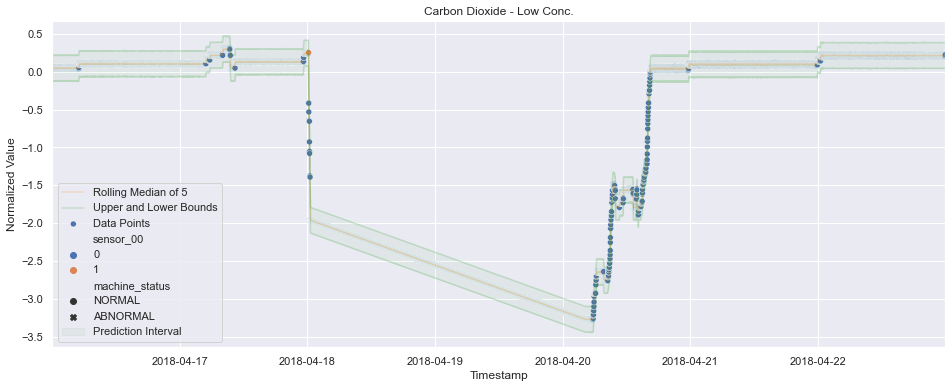

In [103]:
t = ['2018-04-16 00:00:00', '2018-04-23 00:00:00']
series = df_normalized['sensor_00']
series = series.loc[(series.index > pd.to_datetime(t[0])) & (series.index < pd.to_datetime(t[1]))]
styles = df_normalized[(df_normalized.index > pd.to_datetime(t[0])) & (df_normalized.index < pd.to_datetime(t[1]))]["machine_status"]
label = labels['sensor_00']
label = label.loc[(label.index > pd.to_datetime(t[0])) & (label.index < pd.to_datetime(t[1]))]
series_nrm5 = data_nrm5['sensor_00']
series_nrm5 = series_nrm5.loc[(series_nrm5.index > pd.to_datetime(t[0])) & (series_nrm5.index < pd.to_datetime(t[1]))]
fig, ax = plt.subplots(figsize=(16, 6))
sns.scatterplot(series.index, series, hue=label, label='Data Points', style = styles)
plt.plot(series_nrm5.index, series_nrm5, color='tab:orange', label='Rolling Median of 5', alpha=0.2)
plt.plot(series_nrm5.index, series_nrm5+0.17, color='tab:green', label='Upper and Lower Bounds', alpha=0.2)
plt.plot(series_nrm5.index, series_nrm5-0.17, color='tab:green', alpha=0.2)
plt.fill_between(series_nrm5.index, series_nrm5, series_nrm5+0.17, color='tab:green', alpha=0.05, label='Prediction Interval')
plt.fill_between(series_nrm5.index, series_nrm5, series_nrm5-0.17, color='tab:green', alpha=0.05)
plt.xlim(series.index[0], series.index[-1])
plt.legend()
plt.xlabel('Timestamp')
plt.ylabel('Normalized Value')
plt.title('Carbon Dioxide - Low Conc.')
plt.show()

In [106]:
series_nrm5.isnull().sum()

0